In [307]:

API_KEY = 'cf945f7c6ae5ccebe571bee68aa620a1338ff4bfd1c6c5831cc75bf0c1495cab'
!pip install -q sec-api
!pip install openpyxl


In [308]:

from sec_api import XbrlApi

xbrlApi = XbrlApi(API_KEY)

In [309]:
# URL of Apple's 10-K filings
url_10k_aapl = 'https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/aapl-20230930.htm'

aapl_xbrl_json = xbrlApi.xbrl_to_json(htm_url=url_10k_aapl)
print("Keys of income statement dictionary in XBRL from Apple's 10-K filing")
print('--------------------------------------------------------------------')
print(*list(aapl_xbrl_json['StatementsOfIncome'].keys()), sep=' ')

Keys of income statement dictionary in XBRL from Apple's 10-K filing
--------------------------------------------------------------------
RevenueFromContractWithCustomerExcludingAssessedTax CostOfGoodsAndServicesSold GrossProfit ResearchAndDevelopmentExpense SellingGeneralAndAdministrativeExpense OperatingExpenses OperatingIncomeLoss NonoperatingIncomeExpense IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest IncomeTaxExpenseBenefit NetIncomeLoss EarningsPerShareBasic EarningsPerShareDiluted WeightedAverageNumberOfSharesOutstandingBasic WeightedAverageNumberOfDilutedSharesOutstanding


In [310]:
Examples of Balance Sheet Items

AccountsReceivableNetCurrent
AccountsPayableCurrent
LiabilitiesCurrent
LongTermDebtCurrent
AssetsNoncurrent
RetainedEarningsAccumulatedDeficit
CashAndCashEquivalentsAtCarryingValue
InventoryNet

SyntaxError: invalid syntax (2348518597.py, line 1)

In [311]:
url_10k_aapl = 'https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/aapl-20230930.htm'

aapl_xbrl_json = xbrlApi.xbrl_to_json(htm_url=url_10k_aapl)
print("Keys of income statement dictionary in XBRL from Apple's 10-K filing")
print('--------------------------------------------------------------------')
print(*list(aapl_xbrl_json['BalanceSheets'].keys()), sep=' ')

Keys of income statement dictionary in XBRL from Apple's 10-K filing
--------------------------------------------------------------------
CashAndCashEquivalentsAtCarryingValue MarketableSecuritiesCurrent AccountsReceivableNetCurrent NontradeReceivablesCurrent InventoryNet OtherAssetsCurrent AssetsCurrent MarketableSecuritiesNoncurrent PropertyPlantAndEquipmentNet OtherAssetsNoncurrent AssetsNoncurrent Assets AccountsPayableCurrent OtherLiabilitiesCurrent ContractWithCustomerLiabilityCurrent CommercialPaper LongTermDebtCurrent LiabilitiesCurrent LongTermDebtNoncurrent OtherLiabilitiesNoncurrent LiabilitiesNoncurrent Liabilities CommitmentsAndContingencies CommonStockSharesOutstanding CommonStockSharesIssued CommonStocksIncludingAdditionalPaidInCapital RetainedEarningsAccumulatedDeficit AccumulatedOtherComprehensiveIncomeLossNetOfTax StockholdersEquity LiabilitiesAndStockholdersEquity


In [312]:
import pandas as pd

# Convert XBRL-JSON of balance sheet to pandas DataFrame
def get_balance_sheet(xbrl_json):
    balance_sheet_store = {}

    # Iterate over each US GAAP item in the balance sheet
    for usGaapItem in xbrl_json['BalanceSheets']:
        values = []
        indices = []

        for fact in xbrl_json['BalanceSheets'][usGaapItem]:
            # Only consider items without segment. Not required for our analysis.
            if 'segment' not in fact:
                # Try to extract 'endDate', fallback to 'instant' if 'endDate' does not exist
                if 'endDate' in fact['period']:
                    index = fact['period']['endDate']
                elif 'instant' in fact['period']:
                    index = fact['period']['instant']
                else:
                    continue  # Skip if neither 'endDate' nor 'instant' is found
                
                # Check if 'value' key exists in the fact
                if 'value' in fact:
                    values.append(fact['value'])
                    indices.append(index)
                else:
                    # Skip the fact if 'value' is missing
                    continue 

        balance_sheet_store[usGaapItem] = pd.Series(values, index=indices)

    # Create DataFrame from the dictionary, transpose it to have dates as columns
    balance_sheet = pd.DataFrame(balance_sheet_store).T
    # Set the dates as column names and sort by columns
    balance_sheet = balance_sheet.sort_index(axis=1)
    
    return balance_sheet

# Example usage with a given XBRL-JSON for Apple
balance_sheet_aapl = get_balance_sheet(aapl_xbrl_json)

print("Balance Sheet of Apple's 2022 10-K filing as DataFrame")
print('-----------------')
print(balance_sheet_aapl)


Balance Sheet of Apple's 2022 10-K filing as DataFrame
-----------------
                                                  2020-09-26   2021-09-25  \
CashAndCashEquivalentsAtCarryingValue                    NaN          NaN   
MarketableSecuritiesCurrent                              NaN          NaN   
AccountsReceivableNetCurrent                             NaN          NaN   
NontradeReceivablesCurrent                               NaN          NaN   
InventoryNet                                             NaN          NaN   
OtherAssetsCurrent                                       NaN          NaN   
AssetsCurrent                                            NaN          NaN   
MarketableSecuritiesNoncurrent                           NaN          NaN   
PropertyPlantAndEquipmentNet                             NaN          NaN   
OtherAssetsNoncurrent                                    NaN          NaN   
AssetsNoncurrent                                         NaN          NaN   
Ass

In [313]:
import pandas as pd

# Convert XBRL-JSON of balance sheet to pandas DataFrame
def get_balance_sheet(xbrl_json):
    balance_sheet_store = {}

    # Iterate over each US GAAP item in the balance sheet
    for usGaapItem in xbrl_json['BalanceSheets']:
        values = []
        indices = []

        for fact in xbrl_json['BalanceSheets'][usGaapItem]:
            # Only consider items without segment. Not required for our analysis.
            if 'segment' not in fact:
                # Try to extract 'endDate', fallback to 'instant' if 'endDate' does not exist
                if 'endDate' in fact['period']:
                    index = fact['period']['endDate']
                elif 'instant' in fact['period']:
                    index = fact['period']['instant']
                else:
                    continue  # Skip if neither 'endDate' nor 'instant' is found
                
                # Check if 'value' key exists in the fact
                if 'value' in fact:
                    values.append(fact['value'])
                    indices.append(index)
                else:
                    # Skip the fact if 'value' is missing
                    continue 

        # Create a Series with unique dates and values
        series = pd.Series(values, index=indices)
        # Remove duplicates by keeping the last occurrence
        series = series[~series.index.duplicated(keep='last')]
        
        balance_sheet_store[usGaapItem] = series

    # Create DataFrame from the dictionary, transpose it to have dates as columns
    balance_sheet = pd.DataFrame(balance_sheet_store).T
    # Set the dates as column names and sort by columns
    balance_sheet = balance_sheet.sort_index(axis=1)
    
    return balance_sheet

# Example usage with a given XBRL-JSON for Apple
balance_sheet_aapl = get_balance_sheet(aapl_xbrl_json)

print("Balance Sheet of Apple's 2022 10-K filing as DataFrame")
print('-----------------')
print(balance_sheet_aapl)


Balance Sheet of Apple's 2022 10-K filing as DataFrame
-----------------
                                                  2020-09-26   2021-09-25  \
CashAndCashEquivalentsAtCarryingValue                    NaN          NaN   
MarketableSecuritiesCurrent                              NaN          NaN   
AccountsReceivableNetCurrent                             NaN          NaN   
NontradeReceivablesCurrent                               NaN          NaN   
InventoryNet                                             NaN          NaN   
OtherAssetsCurrent                                       NaN          NaN   
AssetsCurrent                                            NaN          NaN   
MarketableSecuritiesNoncurrent                           NaN          NaN   
PropertyPlantAndEquipmentNet                             NaN          NaN   
OtherAssetsNoncurrent                                    NaN          NaN   
AssetsNoncurrent                                         NaN          NaN   
Ass

In [314]:
url_10k_2019 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/a10-k20199282019.htm'
url_10k_2020 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/aapl-20200926.htm'
url_10k_2021 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/aapl-20210925.htm'
url_10k_2022 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/aapl-20220924.htm'
url_10k_2023 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/aapl-20230930.htm'


xbrl_json_2019 = xbrlApi.xbrl_to_json(htm_url=url_10k_2019)
xbrl_json_2020 = xbrlApi.xbrl_to_json(htm_url=url_10k_2020)
xbrl_json_2021 = xbrlApi.xbrl_to_json(htm_url=url_10k_2021)
xbrl_json_2022 = xbrlApi.xbrl_to_json(htm_url=url_10k_2022)
xbrl_json_2023 = xbrlApi.xbrl_to_json(htm_url=url_10k_2023)

balance_sheet_2019 = get_balance_sheet(xbrl_json_2019)
balance_sheet_2020 = get_balance_sheet(xbrl_json_2020)
balance_sheet_2021 = get_balance_sheet(xbrl_json_2021)
balance_sheet_2022= get_balance_sheet(xbrl_json_2022)
balance_sheet_2023 = get_balance_sheet(xbrl_json_2023)





In [317]:
import pandas as pd

# Concatenate the specified columns from each DataFrame along the rows (axis=0)
combined_df = pd.concat([
    balance_sheet_2019.iloc[:, 3:4],
    balance_sheet_2020.iloc[:, 3:4],
    balance_sheet_2021.iloc[:, 3:4],
    balance_sheet_2022.iloc[:, 3:4],
    balance_sheet_2023.iloc[:, 3:4]
])

combined_df

combined_df.to_csv('Filename10(3).csv', index=True)



In [329]:
df=pd.read_csv('kyrie.csv')
df



,Unnamed: 0,28-09-2019,26-09-2020,25-09-2021,24-09-2022,30-09-2023
0,CashAndCashEquivalentsAtCarryingValue,4.884400e+10,3.801600e+10,3.494000e+10,2.364600e+10,2.996500e+10
1,MarketableSecuritiesCurrent,5.171300e+10,5.292700e+10,2.769900e+10,2.465800e+10,3.159000e+10
2,AccountsReceivableNetCurrent,2.292600e+10,1.612000e+10,2.627800e+10,2.818400e+10,2.950800e+10
3,InventoryNet,4.106000e+09,4.061000e+09,6.580000e+09,4.946000e+09,3.147700e+10
4,NontradeReceivablesCurrent,2.287800e+10,2.132500e+10,2.522800e+10,3.274800e+10,6.331000e+09
5,OtherAssetsCurrent,1.235200e+10,1.126400e+10,1.411100e+10,2.122300e+10,1.469500e+10
6,AssetsCurrent,1.628190e+11,1.437130e+11,1.348360e+11,1.354050e+11,1.435660e+11
7,MarketableSecuritiesNoncurrent,1.053410e+11,1.008870e+11,1.278770e+11,1.208050e+11,1.005440e+11
8,PropertyPlantAndEquipmentNet,3.737800e+10,3.676600e+10,3.944000e+10,4.211700e+10,4.371500e+10
9,OtherAssetsNoncurrent,3.297800e+10,4.252200e+10,4.884900e+10,5.442800e+10,6.475800e+10


In [331]:


# Display the first row of the DataFrame
df2=df.iloc[[0]]
df2

,Unnamed: 0,28-09-2019,26-09-2020,25-09-2021,24-09-2022,30-09-2023
0,CashAndCashEquivalentsAtCarryingValue,4.884400e+10,3.801600e+10,3.494000e+10,2.364600e+10,2.996500e+10


In [333]:
df3=df.iloc[[28]]
df3

,Unnamed: 0,28-09-2019,26-09-2020,25-09-2021,24-09-2022,30-09-2023
28,ROE,61.064451,87.866359,150.071327,196.958873,156.076015


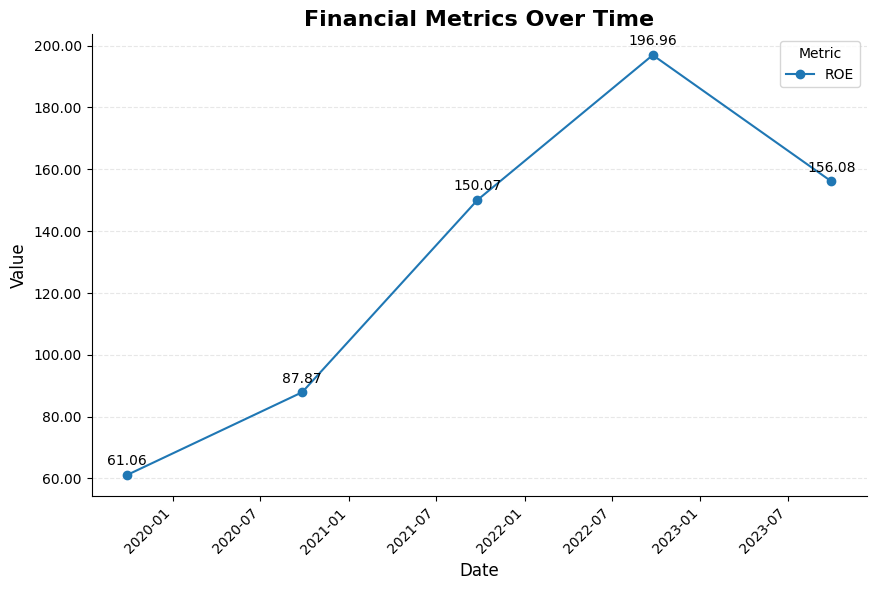

In [334]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Sample DataFrame creation (assuming df3 is already loaded)



# Set the index but keep the 'Unnamed: 0' column
df3.set_index('Unnamed: 0', inplace=True)

# Transpose the DataFrame so that dates become the index
df3_transposed = df3.T

# Convert the index to datetime
df3_transposed.index = pd.to_datetime(df3_transposed.index, format='%d-%m-%Y').date

# Plotting the data as a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each line with a different color
for column in df3_transposed.columns:
    ax.plot(df3_transposed.index, df3_transposed[column], marker='o', label=column)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title and labels for the chart
ax.set_title("Financial Metrics Over Time", fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Add gridlines for the y-axis
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format y-axis ticks to show values with no specific formatting
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.2f}')
ax.yaxis.set_major_formatter(formatter)

# Add the values to each data point
for column in df3_transposed.columns:
    for x, y in zip(df3_transposed.index, df3_transposed[column]):
        ax.annotate(f'{y:.2f}', 
                    (x, y), 
                    ha='center', va='bottom', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Add a legend
ax.legend(title='Metric')

# Show the plot
plt.show()



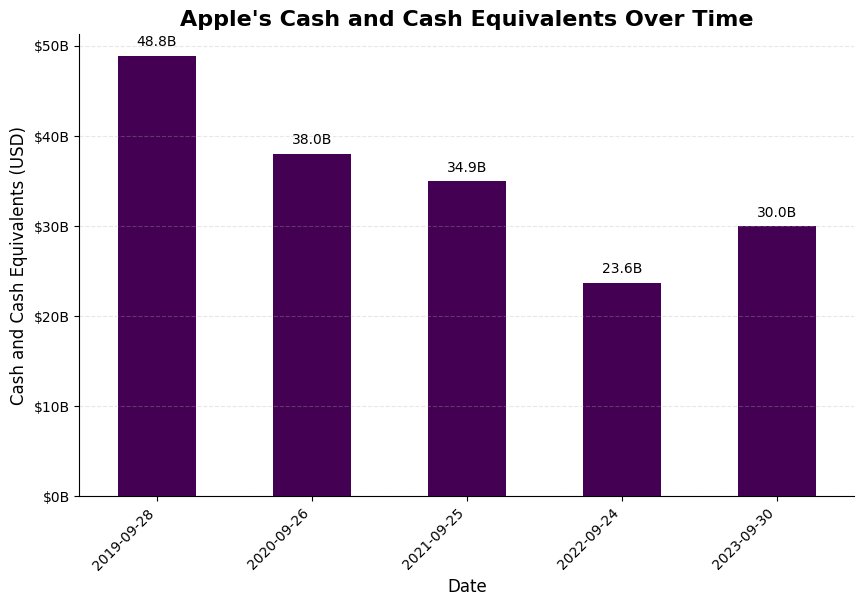

In [219]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd




# Transpose the DataFrame and set the index
df2_transposed = df2.set_index('Factors').T

# Convert the index to datetime, but keep only the date part
df2_transposed.index = pd.to_datetime(df2_transposed.index, format='%d-%m-%Y').date

# Plotting the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(range(len(df2_transposed)))

df2_transposed.plot(kind='bar', color=colors, ax=ax, legend=False)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title and labels for the chart
ax.set_title("Apple's Cash and Cash Equivalents Over Time", fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cash and Cash Equivalents (USD)', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format y-axis ticks to show values in billions of dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x * 1e-9))
plt.gca().yaxis.set_major_formatter(formatter)

# Add the values in billions of dollars to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e9:.1f}B', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


# **INCOME STATEMENT**

In [221]:
url_10k_2019 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/a10-k20199282019.htm'
url_10k_2020 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/aapl-20200926.htm'
url_10k_2021 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/aapl-20210925.htm'
url_10k_2022 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/aapl-20220924.htm'
url_10k_2023 = 'https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/aapl-20230930.htm'


xbrl_json_2019 = xbrlApi.xbrl_to_json(htm_url=url_10k_2019)
xbrl_json_2020 = xbrlApi.xbrl_to_json(htm_url=url_10k_2020)
xbrl_json_2021 = xbrlApi.xbrl_to_json(htm_url=url_10k_2021)
xbrl_json_2022 = xbrlApi.xbrl_to_json(htm_url=url_10k_2022)
xbrl_json_2023 = xbrlApi.xbrl_to_json(htm_url=url_10k_2023)

Exception: API error: 429 - {"status":429,"error":"You send a lot of requests. We like that. But you exceeded the free query limit of 100 requests. Upgrade your account to get unlimited access. Visit sec-api.io for more."}

In [222]:

income_statement_2019 = get_income_statement(xbrl_json_2019)
income_statement_2020 = get_income_statement(xbrl_json_2020)
income_statement_2021 = get_income_statement(xbrl_json_2021)
income_statement_2022 = get_income_statement(xbrl_json_2022)
income_statement_2023 = get_income_statement(xbrl_json_2023)


In [223]:

income_statements_merged = pd.concat([income_statement_2019, income_statement_2020, income_statement_2021, income_statement_2022,income_statement_2023], axis=0, sort=False)

# sort & reset the index of the merged dataframe
income_statements_merged = income_statements_merged.sort_index().reset_index()

# convert cells to float
income_statements_merged = income_statements_merged.applymap(lambda x: pd.to_numeric(x, errors='ignore'))


print("Merged, uncleaned financials of all income statements")
print('-----------------------------------------------------')
income_statements_merged.head(10)

Merged, uncleaned financials of all income statements
-----------------------------------------------------


C:\Users\swaraj\AppData\Local\Temp\ipykernel_4340\1058323067.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  income_statements_merged = income_statements_merged.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
C:\Users\swaraj\AppData\Local\Temp\ipykernel_4340\1058323067.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  income_statements_merged = income_statements_merged.applymap(lambda x: pd.to_numeric(x, errors='ignore'))


,index,2016-09-25-2017-09-30,2017-10-01-2017-12-30,2017-10-01-2018-09-29,2017-12-31-2018-03-31,2018-04-01-2018-06-30,2018-07-01-2018-09-29,2018-09-30-2018-12-29,2018-09-30-2019-09-28,2018-12-30-2019-03-30,2019-03-31-2019-06-29,2019-06-30-2019-09-28,2019-09-29-2019-12-28,2019-09-29-2020-09-26,2019-12-29-2020-03-28,2020-03-29-2020-06-27,2020-06-28-2020-09-26,2020-09-27-2021-09-25,2021-09-26-2022-09-24,2022-09-25-2023-09-30
0,CostOfGoodsAndServicesSold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.617820e+11,NaN,NaN,NaN,NaN,1.695590e+11,NaN,NaN,NaN,2.129810e+11,NaN,NaN
1,CostOfGoodsAndServicesSold,1.410480e+11,NaN,1.637560e+11,NaN,NaN,NaN,NaN,1.617820e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CostOfGoodsAndServicesSold,NaN,NaN,1.637560e+11,NaN,NaN,NaN,NaN,1.617820e+11,NaN,NaN,NaN,NaN,1.695590e+11,NaN,NaN,NaN,NaN,NaN,NaN
3,CostOfGoodsAndServicesSold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.695590e+11,NaN,NaN,NaN,2.129810e+11,2.235460e+11,NaN
4,CostOfGoodsAndServicesSold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.129810e+11,2.235460e+11,2.141370e+11
5,EarningsPerShareBasic,NaN,NaN,3.000000e+00,NaN,NaN,NaN,1.05,2.990000e+00,0.62,0.55,0.76,1.26,3.310000e+00,0.64,0.65,0.74,NaN,NaN,NaN
6,EarningsPerShareBasic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.990000e+00,NaN,NaN,NaN,NaN,3.310000e+00,NaN,NaN,NaN,5.670000e+00,NaN,NaN
7,EarningsPerShareBasic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310000e+00,NaN,NaN,NaN,5.670000e+00,6.150000e+00,NaN
8,EarningsPerShareBasic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.670000e+00,6.150000e+00,6.160000e+00
9,EarningsPerShareBasic,9.270000e+00,3.92,1.201000e+01,2.75,2.36,2.94,4.22,1.197000e+01,2.47,2.20,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:

income_statements = income_statements_merged.groupby('index').max()

# reindex the merged dataframe using the index of the first dataframe
income_statements = income_statements.reindex(income_statement_2023.index)

# loop over the columns
for col in income_statements.columns[1:]:
    # extract start and end dates from the column label
    splitted = col.split('-')
    start = '-'.join(splitted[:3])
    end = '-'.join(splitted[3:])

    # convert start and end dates to datetime objects
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)

    # calculate the duration between start and end dates
    duration = (end_date - start_date).days / 360

    # drop the column if duration is less than a year
    if duration < 1:
        income_statements.drop(columns=[col], inplace=True)

# convert datatype of cells to readable format, e.g. "2.235460e+11" becomes "223546000000"
income_statements = income_statements.apply(lambda row: pd.to_numeric(row, errors='coerce', downcast='integer').astype(str), axis=1) 


print("Income statements from Apple's 10-K filings (2016 to 2023) as dataframe")
print('------------------------------------------------------------------------')
income_statements

Income statements from Apple's 10-K filings (2016 to 2023) as dataframe
------------------------------------------------------------------------


C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Us

,2016-09-25-2017-09-30,2017-10-01-2018-09-29,2018-09-30-2019-09-28,2019-09-29-2020-09-26,2020-09-27-2021-09-25,2021-09-26-2022-09-24,2022-09-25-2023-09-30
RevenueFromContractWithCustomerExcludingAssessedTax,229234000000,265595000000,260174000000,274515000000,365817000000,394328000000,383285000000
CostOfGoodsAndServicesSold,141048000000,163756000000,161782000000,169559000000,212981000000,223546000000,214137000000
GrossProfit,88186000000,101839000000,98392000000,104956000000,152836000000,170782000000,169148000000
ResearchAndDevelopmentExpense,11581000000,14236000000,16217000000,18752000000,21914000000,26251000000,29915000000
SellingGeneralAndAdministrativeExpense,15261000000,16705000000,18245000000,19916000000,21973000000,25094000000,24932000000
OperatingExpenses,26842000000,30941000000,34462000000,38668000000,43887000000,51345000000,54847000000
OperatingIncomeLoss,61344000000,70898000000,63930000000,66288000000,108949000000,119437000000,114301000000
NonoperatingIncomeExpense,2745000000,2005000000,1807000000,803000000,258000000,-334000000,-565000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,64089000000,72903000000,65737000000,67091000000,109207000000,119103000000,113736000000
IncomeTaxExpenseBenefit,15738000000,13372000000,10481000000,9680000000,14527000000,19300000000,16741000000


In [391]:
# Select a range of columns by their positions
# Example: Select columns from position 2 to 5 (Python indexing starts at 0)
subset = income_statements.iloc[:, 2:7]  # The range 2:6 selects columns at position 2, 3, 4subset
print("Income statements from Apple's 10-K filings (2019 to 2023) as dataframe")
print(type(subset))

subset

Income statements from Apple's 10-K filings (2019 to 2023) as dataframe
<class 'pandas.core.frame.DataFrame'>


,2018-09-30-2019-09-28,2019-09-29-2020-09-26,2020-09-27-2021-09-25,2021-09-26-2022-09-24,2022-09-25-2023-09-30
RevenueFromContractWithCustomerExcludingAssessedTax,260174000000,274515000000,365817000000,394328000000,383285000000
CostOfGoodsAndServicesSold,161782000000,169559000000,212981000000,223546000000,214137000000
GrossProfit,98392000000,104956000000,152836000000,170782000000,169148000000
ResearchAndDevelopmentExpense,16217000000,18752000000,21914000000,26251000000,29915000000
SellingGeneralAndAdministrativeExpense,18245000000,19916000000,21973000000,25094000000,24932000000
OperatingExpenses,34462000000,38668000000,43887000000,51345000000,54847000000
OperatingIncomeLoss,63930000000,66288000000,108949000000,119437000000,114301000000
NonoperatingIncomeExpense,1807000000,803000000,258000000,-334000000,-565000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,65737000000,67091000000,109207000000,119103000000,113736000000
IncomeTaxExpenseBenefit,10481000000,9680000000,14527000000,19300000000,16741000000


In [402]:
revenue_series= subset.iloc[0]

In [403]:
revenue_series

2018-09-30-2019-09-28    260174000000
2019-09-29-2020-09-26    274515000000
2020-09-27-2021-09-25    365817000000
2021-09-26-2022-09-24    394328000000
2022-09-25-2023-09-30    383285000000
Name: RevenueFromContractWithCustomerExcludingAssessedTax, dtype: object

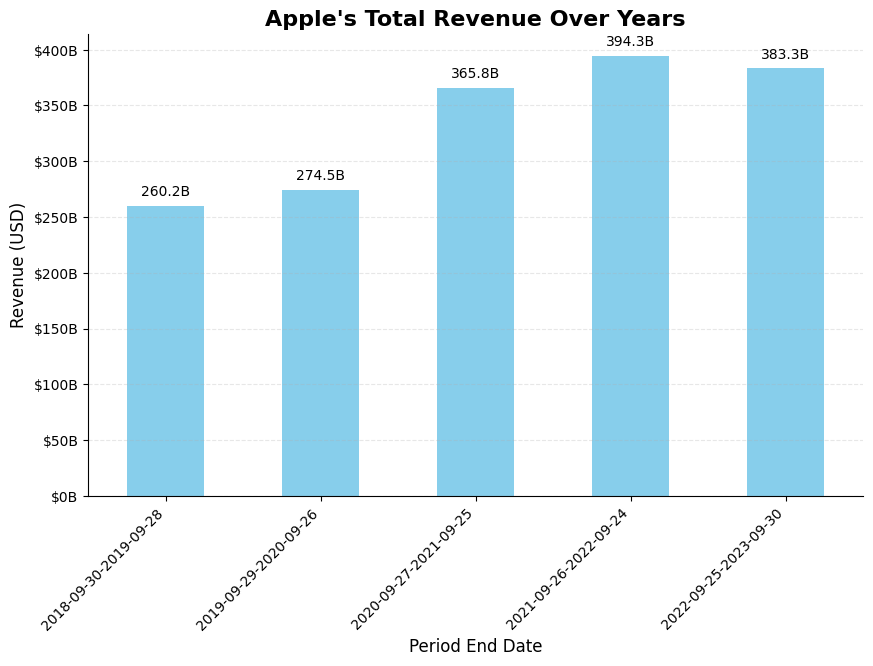

In [404]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Sample data (replace this with your actual data)


# Convert revenue to numeric values
revenue_series = revenue_series.astype(int)

# Plotting the total revenue as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
revenue_series.plot(kind='bar', color='skyblue', ax=ax)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")

# Set the title and labels for the chart
ax.set_title("Apple's Total Revenue Over Years", fontsize=16, fontweight='bold')
ax.set_xlabel('Period End Date', fontsize=12)
ax.set_ylabel('Revenue (USD)', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format y-axis ticks to show values in billions of dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x * 1e-9))
ax.yaxis.set_major_formatter(formatter)

# Add the values in billions of dollars to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e9:.1f}B', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


In [229]:
# Concatenate the revenues across the years
all_revenues_json = xbrl_json_2021['StatementsOfIncome']['GrossProfit'] + \
                    xbrl_json_2022['StatementsOfIncome']['GrossProfit'] + \
                    xbrl_json_2023['StatementsOfIncome']['GrossProfit'] 

# Normalize the JSON data into a pandas DataFrame
all_revenues = pd.json_normalize(all_revenues_json)

# Remove duplicate records
all_revenues.drop_duplicates(inplace=True)

# Convert the 'value' column to a numeric type
all_revenues['value'] = all_revenues['value'].astype(int)

# Group by 'period.endDate' to calculate the total revenue for each period
GrossProfit = all_revenues.groupby('period.endDate')['value'].sum()

# Print the total revenue for each period
print("Apple's GrossProfit from 2018 to 2023")
print('--------------------------------------')
print(GrossProfit)


Apple's GrossProfit from 2018 to 2023
--------------------------------------
period.endDate
2019-09-28     98392000000
2020-09-26    104956000000
2021-09-25    152836000000
2022-09-24    170782000000
2023-09-30    169148000000
Name: value, dtype: int64


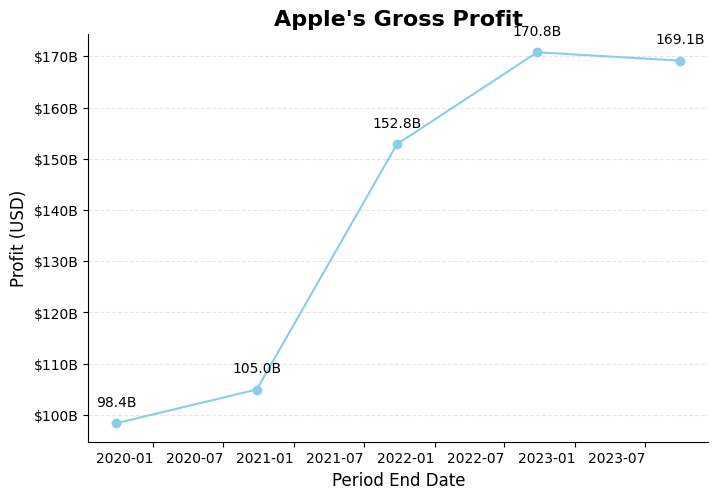

In [230]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Convert 'period.endDate' to datetime format if not already done
GrossProfit.index = pd.to_datetime(GrossProfit.index)

# Plotting the Gross Profit as a line chart
fig, ax = plt.subplots(figsize=(8, 6))
GrossProfit.plot(kind='line', color='skyblue', ax=ax, marker='o', linestyle='-')

# Rotate the x-axis labels by 0 degrees
plt.xticks(rotation=0)

# Set the title and labels for the chart
ax.set_title("Apple's Gross Profit", fontsize=16, fontweight='bold')
ax.set_xlabel('Period End Date', fontsize=12)
ax.set_ylabel('Profit (USD)', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format y-axis ticks to show values in billions of dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x * 1e-9))
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate the points with the values in billions of dollars
for x, y in zip(GrossProfit.index, GrossProfit):
    ax.annotate(f'{y / 1e9:.1f}B', 
                xy=(x, y), xytext=(0, 10),
                textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


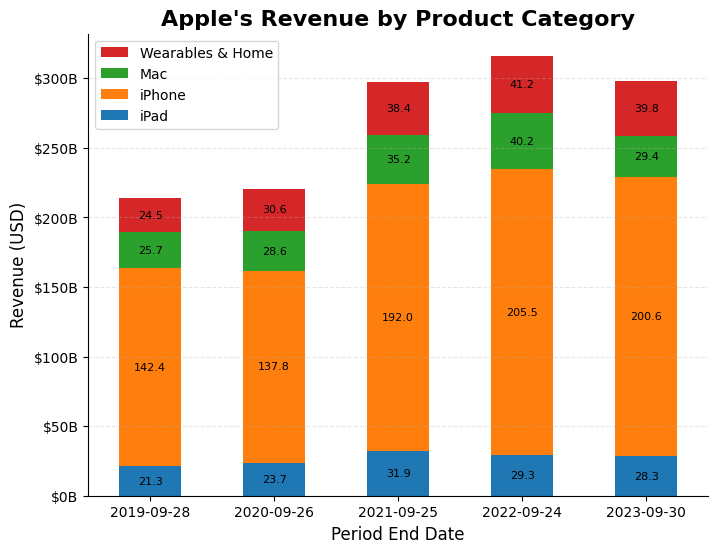

In [235]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plot the histogram bar chart
ax = revenue_product_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))

# rotate the x-axis labels by 0 degrees
plt.xticks(rotation=0)

# set the title and labels for the chart
ax.set_title("Apple's Revenue by Product Category", fontsize=16, fontweight='bold')
ax.set_xlabel('Period End Date', fontsize=12)
ax.set_ylabel('Revenue (USD)', fontsize=12)

# set the legend properties
ax.legend(title='Product Category', loc='upper left', fontsize='small', title_fontsize=10)

# add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y-axis ticks to show values in millions in dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x*1e-9))
plt.gca().yaxis.set_major_formatter(formatter)

# map the original labels to new labels
label_map = {
    'aapl:IPhoneMember': 'iPhone',
    'aapl:MacMember': 'Mac',
    'aapl:IPadMember': 'iPad',
    'aapl:WearablesHomeandAccessoriesMember': 'Wearables & Home'
}

# create a list of new labels based on the original labels
new_labels = [label_map[label] for label in sorted(revenue_product['segment.value'].unique())]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1], labels=new_labels[::-1])

# add the values in billions of dollars to each part of the bar
for p in ax.containers:
    ax.bar_label(p, labels=['%.1f' % (v/1e9) for v in p.datavalues], 
                 label_type='center', fontsize=8)

plt.show()

In [239]:
all_revenues_json = xbrl_json_2021['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] + \
                    xbrl_json_2022['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] + \
                    xbrl_json_2023['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax']

all_revenues = pd.json_normalize(all_revenues_json)

all_revenues.drop_duplicates(inplace=True)
# convert the 'value' column to a numeric type
all_revenues['value'] = all_revenues['value'].astype(int)

mask_iphone = all_revenues['segment.value'] == 'aapl:IPhoneMember'
mask_ipad = all_revenues['segment.value'] == 'aapl:IPadMember'
mask_mac = all_revenues['segment.value'] == 'aapl:MacMember'
mask_wearables = all_revenues['segment.value'] == 'aapl:WearablesHomeandAccessoriesMember'

revenue_product = all_revenues[(mask_iphone | mask_ipad | mask_mac | mask_wearables)]

# pivot the dataframe to create a new dataframe with period.endDate as the index, 
# segment.value as the columns, and value as the values
revenue_product_pivot = revenue_product.pivot(index='period.endDate', columns='segment.value', values='value')


print("Apple's revenues by product from 2018 to 2023")
print('---------------------------------------------')
revenue_product_pivot





Apple's revenues by product from 2018 to 2023
---------------------------------------------


segment.value,aapl:IPadMember,aapl:IPhoneMember,aapl:MacMember,aapl:WearablesHomeandAccessoriesMember
period.endDate,,,,
2019-09-28,21280000000,142381000000,25740000000,24482000000
2020-09-26,23724000000,137781000000,28622000000,30620000000
2021-09-25,31862000000,191973000000,35190000000,38367000000
2022-09-24,29292000000,205489000000,40177000000,41241000000
2023-09-30,28300000000,200583000000,29357000000,39845000000


In [240]:
mask_america = all_revenues['segment.value'] == 'aapl:AmericasSegmentMember'
mask_europe = all_revenues['segment.value'] == 'aapl:EuropeSegmentMember'
mask_china = all_revenues['segment.value'] == 'aapl:GreaterChinaSegmentMember'
mask_japan = all_revenues['segment.value'] == 'aapl:JapanSegmentMember'
mask_asia_rest = all_revenues['segment.value'] == 'aapl:RestOfAsiaPacificSegmentMember'

revenue_geo = all_revenues[(mask_america | mask_europe | mask_china | mask_japan | mask_asia_rest)]

# pivot the dataframe to create a new dataframe with period.endDate as the index, segment.value as the columns, and value as the values
revenue_geo_pivot = revenue_geo.pivot(index='period.endDate', columns='segment.value', values='value')


print("Apple's revenues by region from 2017 to 2022")
print('---------------------------------------------')
revenue_geo_pivot

Apple's revenues by region from 2017 to 2022
---------------------------------------------


segment.value,aapl:AmericasSegmentMember,aapl:EuropeSegmentMember,aapl:GreaterChinaSegmentMember,aapl:JapanSegmentMember,aapl:RestOfAsiaPacificSegmentMember
period.endDate,,,,,
2019-09-28,116914000000,60288000000,43678000000,21506000000,17788000000
2020-09-26,124556000000,68640000000,40308000000,21418000000,19593000000
2021-09-25,153306000000,89307000000,68366000000,28482000000,26356000000
2022-09-24,169658000000,95118000000,74200000000,25977000000,29375000000
2023-09-30,162560000000,94294000000,72559000000,24257000000,29615000000


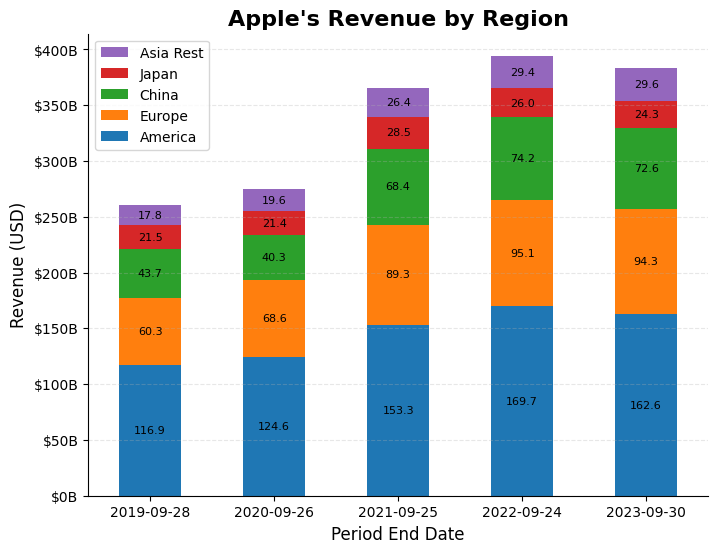

In [241]:


# plot the histogram bar chart
ax = revenue_geo_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))

# rotate the x-axis labels by 0 degrees
plt.xticks(rotation=0)

# set the title and labels for the chart
ax.set_title("Apple's Revenue by Region", fontsize=16, fontweight='bold')
ax.set_xlabel('Period End Date', fontsize=12)
ax.set_ylabel('Revenue (USD)', fontsize=12)

# set the legend properties
ax.legend(title='Region', loc='upper left', fontsize='small', title_fontsize=10)

# add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y-axis ticks to show values in millions in dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x*1e-9))
plt.gca().yaxis.set_major_formatter(formatter)

# map the original labels to new labels
label_map = {
    'aapl:AmericasSegmentMember': 'America',
    'aapl:EuropeSegmentMember': 'Europe',
    'aapl:GreaterChinaSegmentMember': 'China',
    'aapl:JapanSegmentMember': 'Japan',
    'aapl:RestOfAsiaPacificSegmentMember': 'Asia Rest'
}

# create a list of new labels based on the original labels
new_labels = [label_map[label] for label in sorted(revenue_geo['segment.value'].unique())]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1], labels=new_labels[::-1])

# add the values in billions of dollars to each part of the bar
for p in ax.containers:
    ax.bar_label(p, labels=['%.1f' % (v/1e9) for v in p.datavalues], 
                 label_type='center', fontsize=8)

plt.show()

# **textual analysis**

**MADE IN GOOGLE COLLAB**